## CSE 518A - Final Project
#### Generating Dataset

In [112]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [113]:
total_time = 100
total_users = 100
items = 100
init_access = 2

In [114]:
item_attr = stats.truncnorm.rvs(0,.2,size=items)
user_will = stats.truncnorm.rvs(0,.2,size=total_users)

In [120]:
matrix = np.zeros([total_time, total_users, items])
matrix[:,:,:init_access]+=1
contib = np.zeros([total_time, total_users])
user_access = np.zeros(total_users, dtype=int) + init_access

for t in range(total_time):
    for u in range(total_users):
        for i in range(items):
            if matrix[t,u,i] == 1:
                if np.random.random() < user_will[u] * item_attr[i]:
                    contib[t:,u] += 1
                    if user_access[u] < items-1:
                        user_access[u] += 1
                    matrix[t:,u,user_access[u]] += 1

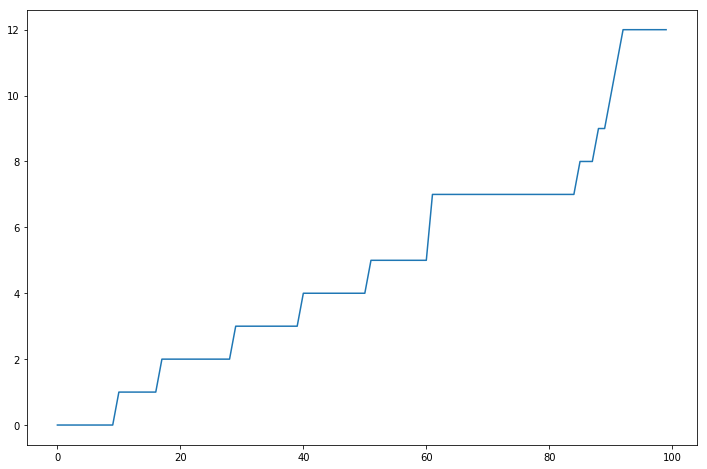

In [121]:
plt.figure(figsize=(12,8))
plt.plot(contib[:,15])

In [122]:
user_will[:10] * item_attr[:10]

array([0.01060427, 0.01206819, 0.02381881, 0.00965308, 0.00551264,
       0.00874374, 0.01263908, 0.01583766, 0.02605199, 0.02761671])

In [123]:
user_will[15]

0.08856958522429645

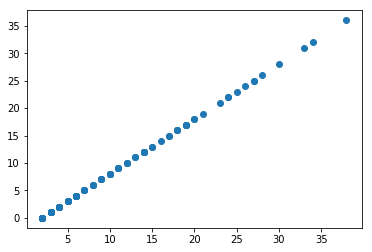

In [124]:
plt.scatter(user_access,contib[-1])